### **EDA Report on Haberman’s Survival Data**
Research Problem: Predict whether a patient will survive after 5 years or not based upon the patient’s age, his or her operation year and the number of positive lymph nodes.

As our main objective is to predict the patient condition for Haberman’s survival dataset, hence a model is required to make such prediction. Usually Linear Regression model, Logistic Regression model, and Non-linear Regression model are more like to apply for such prediction. Each model has some assumptions, before using any model it is required to check the validity of all underlying assumptions of that model. Based on the valid assumptions, we could find an appropriate model for our data set. Since the response variable (status) is dichotomous (having two categories 1 = ‘patients survived 5 years or more’, and 2 = ‘patients survived less than 5 years’), so a Binomial Logistic Regression model is more suitable for this data.

At this point Exploratory Data Analysis can be performed for initial investigations on data, to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. The following sections represent EDA for our data set.

**1.1 Data Description:**
Haberman’s Survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer. The data has 306 rows and 4 columns.

Table 1 represents all the variables description with their value level, level of measurements, and suitable measures.

**Table 1: Variables summary information of Haberman’s Survival Dataset.**

|Variable Name||Variable Description||Value Level||Level of measurements||Appropriate measures|
|---||:-||:-||:-:||:-:|
|age||Age of patient at which they undergone surgery||||Ratio||mean, median, mode|
|operation_year||Year in which patient was undergone surgery (1958-1969)||||Interval||mean, median, mode|
|axil_nodes||Having cancer cells in the lymph nodes under arm suggests an increased risk of the cancer spreading. In our data it is axillary nodes detected (0-52)||1 = patients survived 5 years or more, 2 = patients survived less than 5 years||Ratio||mean, median, mode|
|status||It represent whether patient survive more than 5 years or less after undergone through surgery.||Nominal||Mode|

**1.2 Objectives for EDA:**
Survival status of patient is the main response variable for our study, as we have to predict that using remaining variables. Hence, to establish the main objective of our study, we could specify the following objectives.



*   To specify the distribution of Age, Axillary nodes and Operation year of patients.
*   To reveal the different proportion of survival experience of patients after surgery.
*   To calculate different summary measures of Age, Axillary nodes, Survival status and Operation year of patients.
*   To find the association between Survival status with other variables.
*   To illustrate correlation matrix of different variables.







**1.3 Data Cleaning:**
In the phase of data cleaning, we are interested to check the missing values and the outliers of our data set.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
#read csv data file which is saved in the same directory of python
# df is the data name
df = pd.read_csv('/content/drive/MyDrive/sampledata/haberman.csv')
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             306 non-null    int64
 1   operation_year  306 non-null    int64
 2   axil_nodes      306 non-null    int64
 3   status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


We have 4 variables and 306 observations in our dataset. No Missing values were found in our dataset. Now we will make the boxplot to see the outliers in this dataset.

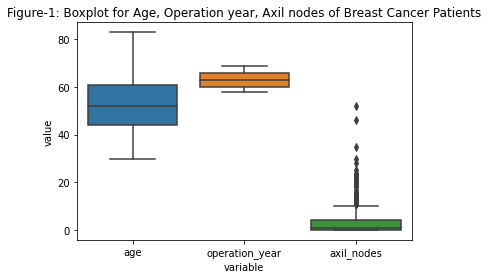

In [ ]:
#Figure 2
sns.boxplot(x="variable", y="value", data=pd.melt(df[['age','operation_year','axil_nodes']]))
#plt.boxplot(x, vert = 0)
plt.title('Figure-1: Boxplot for Age, Operation year, Axil nodes of Breast Cancer Patients')
plt.show()

Figure 1 presents that variables, age and operation_year, do not have any outlier but axil_nodes variable does have some outliers. We may delete all the observations along with the axil_nodes outliers, hereafter, we may use some robust statistics to calculate different features of this dataset. However, at this point we will consider entire dataset to calculate various measures (as we are not aware of different robust statistics).

**1.4 Univariate Analysis:**
In this survival data, variables ‘age’ and ‘axil_nodes’ are ratio, ‘operation_year’ is interval, and the variable ‘status’ is nominal. Hence, we could make a pie chart or a bar diagram for the variable ‘status’, and a histogram, a boxplot or a stem-and-leaf plot for the variables ‘operation_year’, ‘age’ and ‘axil_nodes’

**1.4.1 Graphical Representations:**

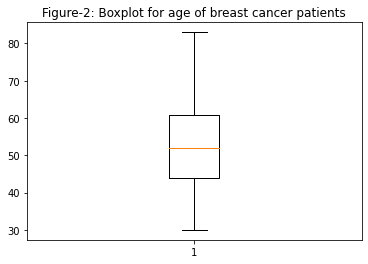

In [ ]:
plt.boxplot(df.age)
plt.title('Figure-2: Boxplot for age of breast cancer patients')
plt.show()

Figure 2 represents the bosplot of age of cancer patients, which suggests that overall distribution of age of patient is about symmetric and the middle 50% observations have a symmetric distribution with an average 52 years. There is no outlier. Similar information about the shape of the distribution is found in Figure 3, and the majority of operations are performed on people age range between 40 and 68.

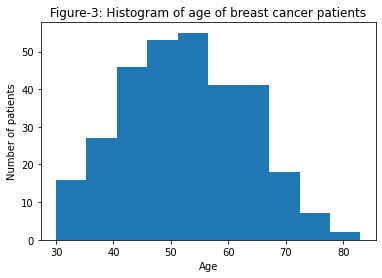

In [ ]:
### Histogram
plt.hist(df.age, bins = 10)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Figure-3: Histogram of age of breast cancer patients')
plt.show()


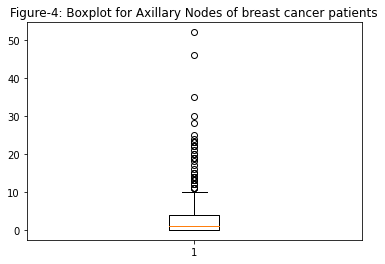

In [ ]:
plt.boxplot(df.axil_nodes)
plt.title('Figure-4: Boxplot for Axillary Nodes of breast cancer patients')
plt.show()

Figure 4 explores that axillary nodes has a positively skewed distribution with some outliers. A positively skewed distribution is also observed in Figure 5, with a high concentration of axillary nodes are between 0 to 5.

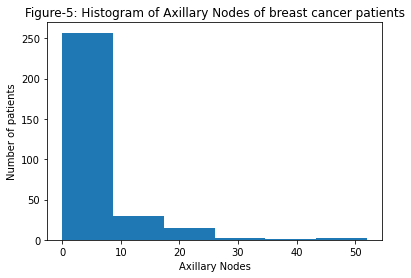

In [ ]:
### Histogram
plt.hist(df.axil_nodes, bins = 6)
plt.xlabel('Axillary Nodes')
plt.ylabel('Number of patients')
plt.title('Figure-5: Histogram of Axillary Nodes of breast cancer patients')
plt.show()

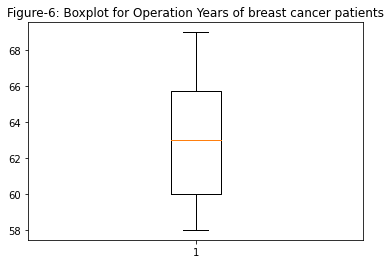

In [ ]:
plt.boxplot(df.operation_year)
plt.title('Figure-6: Boxplot for Operation Years of breast cancer patients')
plt.show()

It seems from Figure 6 that between the years 1958 to 1969 all the patients in our data had undergone surgery. Maximum number of surgeries was undergone in the year 1958 among all patients in Figure 7.

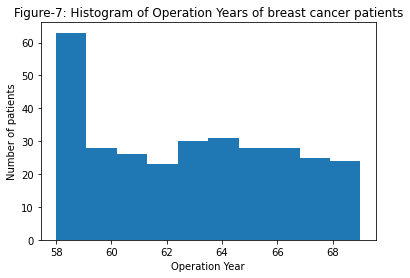

In [ ]:
### Histogram
plt.hist(df.operation_year, bins = 10)
plt.xlabel('Operation Year')
plt.ylabel('Number of patients')
plt.title('Figure-7: Histogram of Operation Years of breast cancer patients')
plt.show()

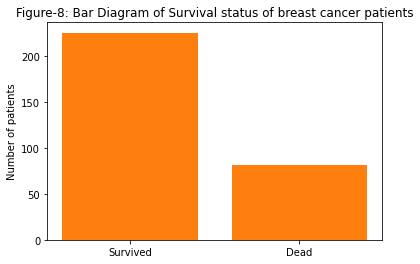

In [ ]:
#Bar Diagram
objects = ('Survived', 'Dead')
x_obs = np.arange(len(objects))
status = df['status'].value_counts()

plt.bar(objects, status)
plt.bar(x_obs, status)
plt.xticks(x_obs, objects)

plt.ylabel('Number of patients')
plt.title('Figure-8: Bar Diagram of Survival status of breast cancer patients')
plt.show()

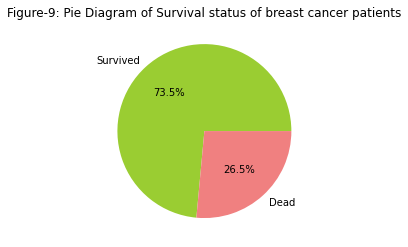

In [ ]:
#Pie plot
status = df['status'].value_counts()
plt.pie(status, labels=['Survived', 'Dead'], colors=['yellowgreen', 'lightcoral'],  autopct='%.1f%%')
plt.title('Figure-9: Pie Diagram of Survival status of breast cancer patients')
plt.show()

Figure 9 illustrates the survival status of patients who had undergone the surgery, there are 73.5% patients are survived more than 5 years and only 26.5% patients survived less than 5 years.

**1.4.2 Summary Measures:**

Using df.describe(), df.mode(), df.median() commands we can make the following table.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
operation_year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
axil_nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [ ]:
df.mode()

,age,operation_year,axil_nodes,status
0,52,58,0,1


cam

**1.5 Bivariate Analysis:**

**1.5.1 Graphical Representations:**

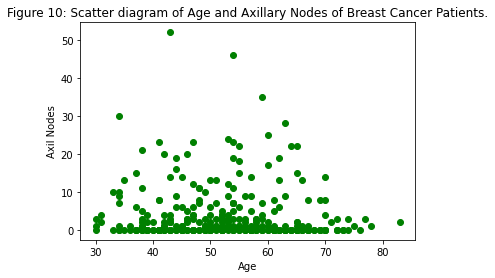

In [ ]:
#Figure 10
#Scatter Diagram
plt.scatter(df['age'],df['axil_nodes'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Axil Nodes')
plt.title('Axil_nodes vs Age')
plt.title('Figure 10: Scatter diagram of Age and Axillary Nodes of Breast Cancer Patients.')
plt.show()

Figure 10 shows that there is a very week positive linear correlation between age and axillary nodes of patients and a quite good concentration of patients at different ages with axillary nodes is 0.

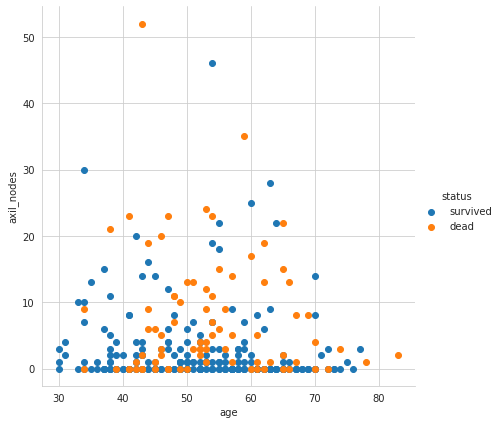

In [ ]:
#to label status variable in readable format, 1 labeled as 'survived' and 2 labeled as 'dead'
df['status'] = df['status'].map({1:'survived', 2:'dead'})

#Figure 11
sns.set_style('whitegrid');
g=sns.FacetGrid(df, hue = 'status', height = 6)
g.map(plt.scatter, 'age', 'axil_nodes')
g.add_legend()

**Figure 11: Scatter diagram of Age and Axillary Nodes at Survival Status of Breast Cancer Patients.**

Figures 11 reveals that patients with 0 axillary nodes are more likely to survive irrespective to there age. It is very much less likely to have patients with axillary nodes more than 30. Patients who are older than 50 and have axillary nodes greater.

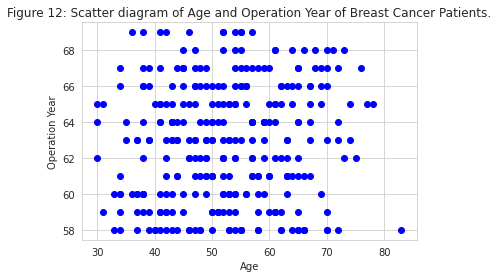

In [ ]:
#Figure 12
#Scatter Diagram
plt.scatter(df['age'],df['operation_year'], color = 'b')
plt.xlabel('Age')
plt.ylabel('Operation Year')
plt.title('Age vs Operation Year')
plt.title('Figure 12: Scatter diagram of Age and Operation Year of Breast Cancer Patients.')
plt.show()

There is no linear relationship between age and operation year of patients, which reveals in Figure 12.

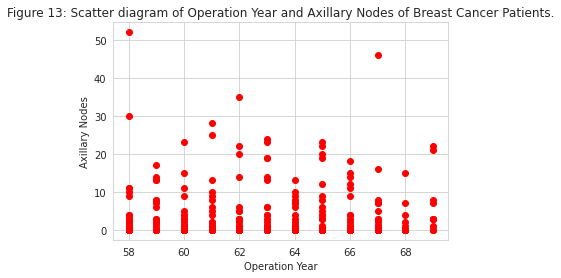

In [ ]:
#Figure 13
#Scatter Diagram
plt.scatter(df['operation_year'],df['axil_nodes'], color = 'r')
plt.xlabel('Operation Year')
plt.ylabel('Axillary Nodes')
plt.title('Operation Year vs Axillary Nodes')
plt.title('Figure 13: Scatter diagram of Operation Year and Axillary Nodes of Breast Cancer Patients.')
plt.show()

There is almost no linear relationship between axillary nodes and operation year of patients. We could construct different boxplot for age, axillary nodes and operation year of patients at survival status to illustrates different relationships.

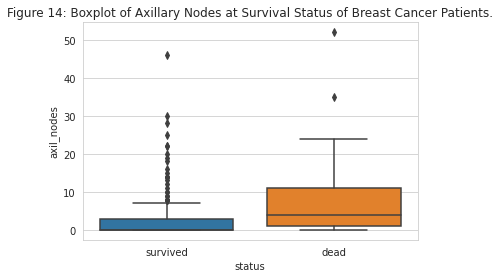

In [ ]:
sns.boxplot(x='status', y='axil_nodes', data=df)
plt.title('Figure 14: Boxplot of Axillary Nodes at Survival Status of Breast Cancer Patients.')
plt.show()

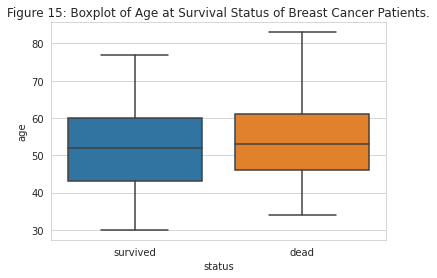

In [ ]:
sns.boxplot(x='status', y='age', data=df)
plt.title('Figure 15: Boxplot of Age at Survival Status of Breast Cancer Patients.')
plt.show()

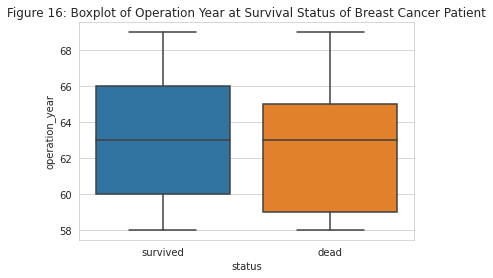

In [ ]:
sns.boxplot(x='status', y='operation_year', data=df)
plt.title('Figure 16: Boxplot of Operation Year at Survival Status of Breast Cancer Patient')
plt.show()

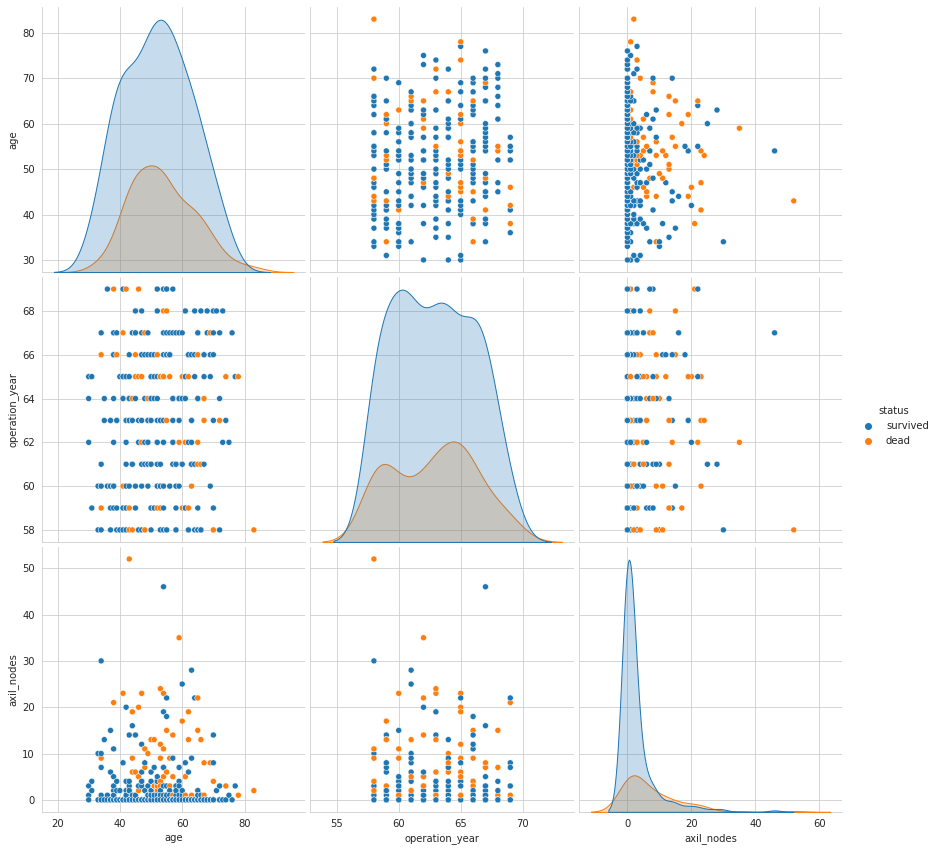

In [ ]:
#Figure 17
#Pairplots
sns.set_style('whitegrid');
sns.pairplot(df, hue = 'status', height = 4)
plt.show()

**Figure 17: Pairplots of Age, Operation Year and Axillary Nodes at Survival Status of Breast Cancer Patients.**

Figure 17 explores histograms for each variables and scatter diagrams between each pair of variables at survival status ‘survived’ with blue dots and at survival status ‘dead’ with orange dots. Histogram of the age of patients for survived and dead statuses are
overlapping each other, but still we can say that patients within range of 40-60 are more likely to die and patients less than age 40 are more likely to survive. Histogram of operation year of patients shows that large number of patients died whose operation was done in year 1960 and 1965 (bi-modal shape). Histogram of axillary nodes of patients represents that patients with less than 10 axillary nodes are more likely to survive.

**1.5.2 Summary Measures:**
Using data.corr(), data.cov() commands we can make the following table.

**Table 3: Correlation Matrix of different variables of Haberman’s Survival Dataset.**

In [ ]:
df.corr()

,age,operation_year,axil_nodes
age,1.000000,0.089529,-0.063176
operation_year,0.089529,1.000000,-0.003764
axil_nodes,-0.063176,-0.003764,1.000000


Age and operation year had week positive correlation, whereas, axillary nodes had week negative correlation with age and operation year of patients.

**Table 4: Covariance Matrix of different variables of Haberman’s Survival Dataset.**

In [ ]:
df.cov()

,age,operation_year,axil_nodes
age,116.714583,3.142912,-4.907082
operation_year,3.142912,10.558631,-0.087946
axil_nodes,-4.907082,-0.087946,51.691118


**1.6 Discussion:**

From all the figures and tables, it is exhibited that survival status has an impact on age, operation year and axillary nodes of patients. The survival status is a dichotomous variable with two categories: survived and dead. So we could use a binary logistic regression model to predict the patient survival condition, whether survive after 5 years or not based upon the patient’s age, his or her operation year and the number of axillary nodes.